# 7. Нахождение и обработка контуров - Individual

In [12]:
import cv2
from matplotlib import pyplot as plt

In [13]:
# функция ввода изображения
def img_input(img_path, size=(0, 0), type=1):
    img = cv2.imread(img_path, type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img


# функция вывода изображения
def img_print(images, titles, row_and_colm=(0, 0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

## 1. С помощью функции cv2.findContours найти все контуры изображения.

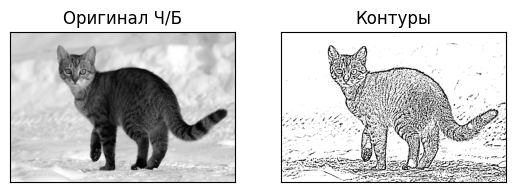

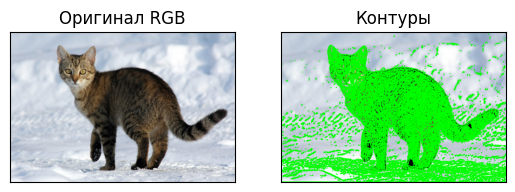

In [14]:
image_rgb = img_input('img/ind.jpg')
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Используем функцию с адаптивным порогом
image_blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Определим контуры
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Нарисуем все найденные контуры
img_with_contours = image_rgb.copy()
for contour in contours:
    cv2.drawContours(img_with_contours, contour, -1, (0, 255, 0), 3)

res1 = [gray, thresh]
title1 = ['Оригинал Ч/Б', 'Контуры']

img_print(res1, title1, hard_type='gray')

res2 = [image_rgb, img_with_contours]
title2 = ['Оригинал RGB', 'Контуры']

img_print(res2, title2)

## 2. Протестировать функцию поиска контура cv2.findContours с аргументом cv2.CHAIN_APPROX_SIMPLE, который экономит память

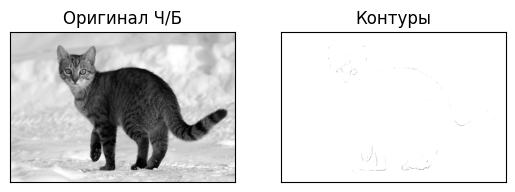

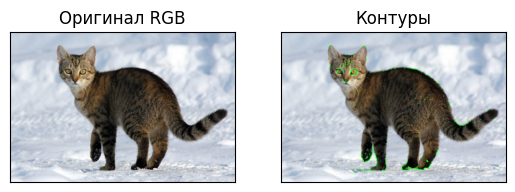

In [15]:
image_rgb = img_input('img/ind.jpg')
gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Функция размытия (сглаживания) изображения медианным фильтром, где 5 –параметр размытия
# (можно выбирать только нечетным и больше 1)
image_blur = cv2.medianBlur(gray, 5)

# Превращаем входное изображения в бинарноинвертированное изображение. Здесь 255 – максимальное значение, 3 – пороговое значение для пикселя (толщина контура), 10 – пороговое значение для всего изображения
thresh = cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,10)

 # При использовании cv2.CHAIN_APPROX_SIMPLE экономим память
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = image_rgb.copy()

for contour in contours:
    cv2.drawContours(img_with_contours, contour, -1, (0,255,0), 2)

res1 = [gray, thresh]
title1 = ['Оригинал Ч/Б', 'Контуры']

img_print(res1, title1, hard_type='gray')

res2 = [image_rgb, img_with_contours]
title2 = ['Оригинал RGB', 'Контуры']

img_print(res2, title2)

## 3.  Выделить границу методом Канни.

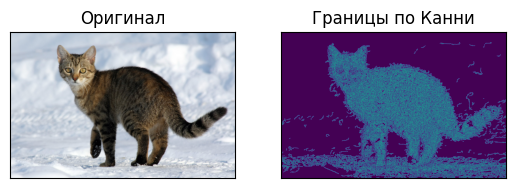

In [16]:
image = img_input('img/ind.jpg', size=(1440,933))
edges = cv2.Canny(image, 47, 0, apertureSize = 3)

res = [image, edges]
title = ['Оригинал', 'Границы по Канни']

img_print(res, title)